<a href="https://colab.research.google.com/github/Ashraful-Reza/Statistics-For-Data-Science/blob/main/Simulated_%26_genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated Annealing

Iteration 0: temp = (27.7926811598144, 50.452991281165545)
Iteration 0: cost = 0
Iteration 1: temp = (25.26785859162738, 41.9932116709154)
Iteration 1: cost = 8.0067883290846
Iteration 2: temp = (27.844449160727002, 43.76458976530423)
Iteration 2: cost = 6.23541023469577
Iteration 3: temp = (27.220328082432793, 54.999163544992435)
Iteration 3: cost = 0
Iteration 4: temp = (23.300650970766903, 45.399206952819945)
Iteration 4: cost = 0
Iteration 5: temp = (25.337396737788573, 50.963634166508584)
Iteration 5: cost = 0
Iteration 6: temp = (20.810417766918604, 54.25946662447301)
Iteration 6: cost = 4.189582233081396
Iteration 7: temp = (22.379890017983705, 43.92569103076468)
Iteration 7: cost = 6.074308969235318
Iteration 8: temp = (29.950433576190065, 44.77931736429832)
Iteration 8: cost = 10.171116211891743
Iteration 9: temp = (21.073302850051792, 55.25907846116434)
Iteration 9: cost = 9.18577561111255
Iteration 10: temp = (22.29926653171278, 44.39899293179875)
Iteration 10: cost = 5.6010

<function matplotlib.pyplot.show(*args, **kw)>

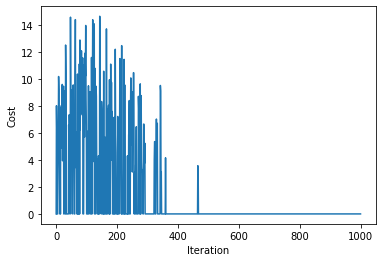

In [ ]:
import random
import math
import matplotlib.pyplot as plt

def simulated_annealing(cost_function, T_init, T_min, alpha, iterations):
  # Initialize the temperature and current state
  T = T_init
  current_state = (random.uniform(20, 30), random.uniform(40, 60))  # Initialize temperature and humidity randomly
  current_cost = cost_function(current_state)

  # Set the best state and cost to the current values
  best_state = current_state
  best_cost = current_cost

  # Initialize lists to store the cost and time at each iteration
  cost_history = []
  time_history = []

  # Iterate over the specified number of iterations
  for i in range(iterations):
    # Generate a random candidate state
    candidate_state = (random.uniform(20, 30), random.uniform(40, 60))  # Generate temperature and humidity randomly
    print(f"Iteration {i}: temp = {candidate_state}")
    candidate_cost = cost_function(candidate_state)

    # Calculate the acceptance probability
    delta_E = candidate_cost - current_cost
    acceptance_probability = min(1, math.exp(-delta_E / T))

    # Randomly accept the candidate with the calculated probability
    if acceptance_probability > random.random():
      current_state = candidate_state
      current_cost = candidate_cost

    # Update the best state and cost if necessary
    if current_cost < best_cost:
      best_state = current_state
      best_cost = current_cost

    # Decrease the temperature according to the specified cooling rate
    T = alpha * T

    # Store the cost and time at each iteration
    cost_history.append(current_cost)
    time_history.append(i)

    # Print the cost function output at each iteration
    print(f"Iteration {i}: cost = {current_cost}")

  return best_state, best_cost, cost_history, time_history

def cost_function(state):
  # Calculate the cost based on the temperature and humidity
  temperature, humidity = state
  cost = 0
  if temperature < 22 or temperature > 28:  # Temperature outside of optimal range
    cost += abs(temperature - 25)  # Penalize temperature deviations from 25 degrees
  if humidity < 45 or humidity > 55:  # Humidity outside of optimal range
    cost += abs(humidity - 50)  # Penalize humidity deviations from 50%
  return cost

# Set the initial temperature, minimum temperature, cooling rate, and number of iterations
T_init = 100
T_min = 1
alpha = 0.99
iterations = 1000

# Optimize the temperature and humidity
optimal_state, optimal_cost, cost_history, time_history = simulated_annealing(cost_function, T_init, T_min, alpha, iterations)

print(f"Optimal temperature and humidity: {optimal_state}")
print(f"Cost at optimal state: {optimal_cost}")
# Plot the cost function output over time
plt.plot(time_history, cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show

Genetic Algorithm

Iteration 49: cost = 0
Optimal state: (22.138084531888826, 49.33506403822682)
Optimal cost: 0
hello [0]


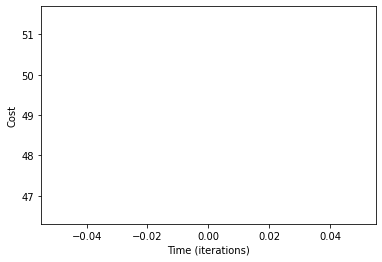

In [53]:
import random
import math
import matplotlib.pyplot as plt

def genetic_algorithm(cost_function, population_size, num_generations, mutation_rate):
  # Initialize the population
  population = []
  for i in range(population_size):
    population.append((random.uniform(20, 30), random.uniform(40, 60)))  # Initialize temperature and humidity randomly

  # Initialize lists to store the cost and time at each iteration
  cost_history = []
  time_history = []

  while True:
  # Calculate the cost of each member of the population
    costs = []
    for member in population:
      costs.append(cost_function(member))

  # Select the top 50% of the population based on cost
    sorted_population = [x for _, x in sorted(zip(costs, population))]
    population = sorted_population[:population_size // 2]

  # Generate offspring by randomly combining pairs of parents
    offspring = []
    for i in range(population_size // 2):
      parent1 = population[i]
      parent2 = population[(i + 1) % len(population)]  # Corrected assignment
      child = (random.uniform(parent1[0], parent2[0]), random.uniform(parent1[1], parent2[1]))  # Combine temperatures and humidities
      offspring.append(child)
  # Mutate the offspring with a probability of mutation_rate
    for i in range(len(offspring)):
      if random.random() < mutation_rate:
        offspring[i] = (random.uniform(20, 30), random.uniform(40, 60))  # Mutate temperature and humidity randomly
  # Replace the current population with the offspring
    population = offspring
  # Calculate the cost of the current population
    costs = []
    for member in population:
      costs.append(cost_function(member))
    current_cost = min(costs)

  # Store the cost and time at each iteration
    cost_history.append(current_cost)
    time_history.append(i)

  # Print the cost function output at each iteration
    print(f"Iteration {i}: cost = {current_cost}")

  # Terminate if the cost is below a certain threshold or the maximum number of iterations has been reached
    if current_cost < 1e-6 or i > 1000:
      break
  # Return the optimal state and cost
  optimal_state = population[costs.index(min(costs))]
  optimal_cost = min(costs)
  return optimal_state, optimal_cost, cost_history, time_history
def cost_function(state):
  # Calculate the cost based on the temperature and humidity
  temperature, humidity = state
  cost = 0
  if temperature < 22 or temperature > 28:  # Temperature outside of optimal range
    cost += abs(temperature - 25)  # Penalize temperature deviations from 25 degrees
  if humidity < 45 or humidity > 55:  # Humidity outside of optimal range
    cost += abs(humidity - 50)  # Penalize humidity deviations from 50%
  return cost
# Set the population size, number of generations, and mutation rate
population_size = 100
num_generations = 1000
mutation_rate = 0.1
# Call the genetic algorithm function to optimize the cost function
optimal_state, optimal_cost, cost_history, time_history = genetic_algorithm(cost_function, population_size, num_generations, mutation_rate)
# Print the optimal state and cost
print(f"Optimal state: {optimal_state}")
print(f"Optimal cost: {optimal_cost}")
#plt.Plot the cost history over time
plt.figure()
plt.subplot(111)
#print('hello',cost_history)
plt.plot(time_history)
plt.xlabel('Time (iterations)')
plt.ylabel('Cost')
plt.show()

Iteration 49: cost = 0.5450061065169188
Iteration 49: cost = 0.15397614068390797
Iteration 49: cost = 0.003098478179286298
Iteration 49: cost = 0.10361374518051729
Iteration 49: cost = 0.041913239231359284
Iteration 49: cost = 0.0015284760272969377
Iteration 49: cost = 0.009536462497800421
Iteration 49: cost = 0.0048319465004035686
Iteration 49: cost = 0.013088918934754007
Iteration 49: cost = 0.00460398722118581
Iteration 49: cost = 0.004683426691437125
Iteration 49: cost = 0.0005918000522334089
Iteration 49: cost = 0.003307173486990693
Iteration 49: cost = 1.5196880815836042e-05
Iteration 49: cost = 0.0014799024075194136
Iteration 49: cost = 2.052313961236469e-05
Iteration 49: cost = 0.0002812849221639104
Iteration 49: cost = 9.882191671196001e-06
Iteration 49: cost = 2.0436900560398557e-05
Iteration 49: cost = 0.00015368843491341805
Iteration 49: cost = 7.87251907575145e-05
Iteration 49: cost = 0.00038462274384569353
Iteration 49: cost = 0.00034943156347343407
Iteration 49: cost = 0

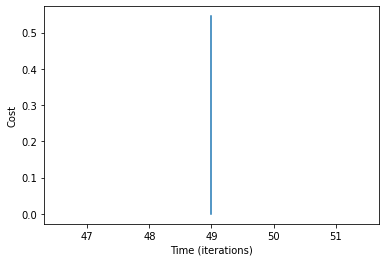

In [ ]:
import random

def genetic_algorithm(cost_function, population_size, num_generations, mutation_rate):
  # Initialize the population
  population = []
  for i in range(population_size):
    population.append((random.uniform(-10, 10), random.uniform(-10, 10)))  # Initialize x and y values randomly

  # Initialize lists to store the cost and time at each iteration
  cost_history = []
  time_history = []

  for i in range(num_generations):
    # Calculate the cost of each member of the population
    costs = []
    for member in population:
      costs.append(cost_function(member))

    # Select the top 50% of the population based on cost
    sorted_population = [x for _, x in sorted(zip(costs, population))]
    population = sorted_population[:population_size // 2]

    # Generate offspring by randomly combining pairs of parents
    offspring = []
    for i in range(population_size // 2):
      parent1 = population[i]
      parent2 = population[(i + 1) % len(population)]  # Corrected assignment
      child = (random.uniform(parent1[0], parent2[0]), random.uniform(parent1[1], parent2[1]))  # Combine x and y values
      offspring.append(child)

    # Mutate the offspring with a probability of mutation_rate
    for i in range(len(offspring)):
      if random.random() < mutation_rate:
        offspring[i] = (random.uniform(-10, 10), random.uniform(-10, 10))  # Mutate x and y values randomly

    # Replace the current population with the offspring
    population = offspring

    # Calculate the cost of the current population
    costs = []
    for member in population:
      costs.append(cost_function(member))
    current_cost = min(costs)

    # Store the cost and time at each iteration
    cost_history.append(current_cost)
    time_history.append(i)

    # Print the cost function output at each iteration
    print(f"Iteration {i}: cost = {current_cost}")
  # Return the optimal state and cost
  optimal_state = population[costs.index(min(costs))]
  optimal_cost = min(costs)
  return optimal_state, optimal_cost, cost_history, time_history

# Define the cost function
def cost_function(state):
  x, y = state
  cost = x**2 + y**2  # Example cost function
  return cost

# Set the population size, number of generations, and mutation rate
population_size = 100
num_generations = 1000
mutation_rate = 0.1

# Call the genetic algorithm function to optimize the cost function
optimal_state, optimal_cost, cost_history, time_history = genetic_algorithm(cost_function, population_size, num_generations, mutation_rate)

# Print the optimal state and cost
print(f"Optimal state: {optimal_state}")
print(f"Optimal cost: {optimal_cost}")

# Plot the cost history over time
import matplotlib.pyplot as plt
plt.plot(time_history, cost_history)
plt.xlabel('Time (iterations)')
plt.ylabel('Cost')
plt.show()


Iteration 0: temp = (23.13824437479093, 51.83737947590582)
Iteration 0: cost = 0
Iteration 1: temp = (25.59917621646021, 59.67164616755577)
Iteration 1: cost = 9.671646167555771
Iteration 2: temp = (28.437255418331553, 49.131722324394744)
Iteration 2: cost = 3.437255418331553
Iteration 3: temp = (20.608316967699633, 52.99456258990267)
Iteration 3: cost = 4.391683032300367
Iteration 4: temp = (23.51826540512321, 47.81368146905007)
Iteration 4: cost = 0
Iteration 5: temp = (24.769115106660365, 47.073984763897975)
Iteration 5: cost = 0
Iteration 6: temp = (21.41522716688966, 44.30019117090328)
Iteration 6: cost = 9.284581662207056
Iteration 7: temp = (23.49185273015801, 47.24048403059095)
Iteration 7: cost = 0
Iteration 8: temp = (29.31350528570453, 48.8913554008756)
Iteration 8: cost = 4.3135052857045295
Iteration 9: temp = (25.10208651848961, 43.119483161828185)
Iteration 9: cost = 6.880516838171815
Iteration 10: temp = (28.03890441468205, 55.188123343198114)
Iteration 10: cost = 8.2270

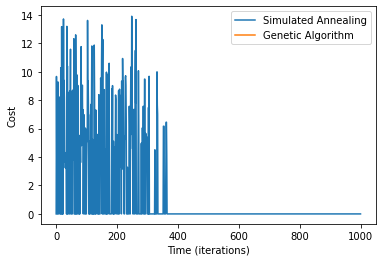

In [ ]:
# Set the initial temperature, minimum temperature, cooling rate, and number of iterations for simulated annealing
T_init = 100
T_min = 1
alpha = 0.99
iterations = 1000

# Optimize the temperature and humidity using simulated annealing
optimal_state, optimal_cost, cost_history_sa, time_history_sa = simulated_annealing(cost_function, T_init, T_min, alpha, iterations)

# Set the population size, number of generations, and mutation rate for the genetic algorithm
population_size = 100
num_generations = 1000
mutation_rate = 0.1

# Optimize the temperature and humidity using the genetic algorithm
optimal_state, optimal_cost, cost_history_ga, time_history_ga = genetic_algorithm(cost_function, population_size, num_generations, mutation_rate)

# Plot the cost history of both algorithms on the same plot
plt.plot(time_history_sa, cost_history_sa, label='Simulated Annealing')
plt.plot(time_history_ga, cost_history_ga, label='Genetic Algorithm')
plt.xlabel('Time (iterations)')
plt.ylabel('Cost')
plt.legend()  # Display the legend
plt.show()



In [58]:
import random
import matplotlib.pyplot as plt

# Chromosome representation: [temp, humidity]

# Fitness function: returns a score for a given chromosome
# based on how well the temperature and humidity settings
# support plant growth in the greenhouse
def evaluate_fitness(chromosome):
  temp = chromosome[0]
  humidity = chromosome[1]
  # Calculate fitness based on temp and humidity
  fitness = 0
  if temp >= 15 and temp <= 25:
    fitness += 1
  if humidity >= 60 and humidity <= 80:
    fitness += 1
  return fitness

# Initialize population with random chromosomes
population = []
for i in range(100):
  chromosome = [random.uniform(0, 30), random.uniform(0, 100)]
  population.append(chromosome)

# Initialize iteration counter
iteration = 0

# Run genetic algorithm
while True:
  # Evaluate fitness of each chromosome
  scores = []
  for chromosome in population:
    score = evaluate_fitness(chromosome)
    scores.append((score, chromosome))
  scores.sort(reverse=True)
  # Select top 50% of chromosomes for reproduction
  num_to_select = int(0.5 * len(scores))
  selected = scores[:num_to_select]
  # Crossover: create new chromosomes by combining
  # genetic material from selected parents
  children = []
  while len(children) < len(population):
    parent1 = random.choice(selected)
    parent2 = random.choice(selected)
    child = [(parent1[0] + parent2[0])/2, (parent1[1] + parent2[1])/2]
    # Mutate child with a small probability
    if random.uniform(0, 1) < 0.1:
      child[0] += random.uniform(-5, 5)
      child[1] += random.uniform(-5, 5)
    children.append(child)
  # Replace population with new children
  population = children

  # Plot temperature and humidity for each chromosome in this generation
  temps = [chromosome[0] for chromosome in population]
  humids = [chromosome[1] for chromosome in population]
  plt.scatter(iteration, temps, humids)

  # Increment iteration counter
  iteration += 1

# Show plot
plt.show()


TypeError: ignored